<a href="https://colab.research.google.com/github/AleWstyd/GAN-emotional-stimuli/blob/main/survey_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/Ankieta twarze1.csv'

In [ ]:
results = pd.read_csv(file_path)
results

,Sygnatura czasowa,Łączny wynik,Do you consent with your personal data being processed for the purpose of this survey? All answers are anonymous. You must click Yes in order to take the survey.,Do you consent with your personal data being processed for the purpose of this survey? All answers are anonymous. You must click Yes in order to take the survey. [wynik],Do you consent with your personal data being processed for the purpose of this survey? All answers are anonymous. You must click Yes in order to take the survey. [ocena],Age (input number),Age (input number) [wynik],Age (input number) [ocena],Gender,Gender [wynik],Gender [ocena],Which of the emotions below best describes the face in the picture?,Which of the emotions below best describes the face in the picture? [wynik],Which of the emotions below best describes the face in the picture? [ocena],Which of the emotions below best describes the face in the picture?.1,Which of the emotions below best describes the face in the picture? [wynik].1,Which of the emotions below best describes the face in the picture? [ocena].1,Which of the emotions below best describes the face in the picture?.2,Which of the emotions below best describes the face in the picture? [wynik].2,Which of the emotions below best describes the face in the picture? [ocena].2,Which of the emotions below best describes the face in the picture?.3,Which of the emotions below best describes the face in the picture? [wynik].3,Which of the emotions below best describes the face in the picture? [ocena].3,Which of the emotions below best describes the face in the picture?.4,Which of the emotions below best describes the face in the picture? [wynik].4,Which of the emotions below best describes the face in the picture? [ocena].4,Which of the emotions below best describes the face in the picture?.5,Which of the emotions below best describes the face in the picture? [wynik].5,Which of the emotions below best describes the face in the picture? [ocena].5,Which of the emotions below best describes the face in the picture?.6,Which of the emotions below best describes the face in the picture? [wynik].6,Which of the emotions below best describes the face in the picture? [ocena].6,Which of the emotions below best describes the face in the picture?.7,Which of the emotions below best describes the face in the picture? [wynik].7,Which of the emotions below best describes the face in the picture? [ocena].7,Which of the emotions below best describes the face in the picture?.8,Which of the emotions below best describes the face in the picture? [wynik].8,Which of the emotions below best describes the face in the picture? [ocena].8,Which of the emotions below best describes the face in the picture?.9,Which of the emotions below best describes the face in the picture? [wynik].9,...,Do you think the face is real or generated? [ocena].28,Do you think the face is real or generated?.29,Do you think the face is real or generated? [wynik].29,Do you think the face is real or generated? [ocena].29,Do you think the face is real or generated?.30,Do you think the face is real or generated? [wynik].30,Do you think the face is real or generated? [ocena].30,Do you think the face is real or generated?.31,Do you think the face is real or generated? [wynik].31,Do you think the face is real or generated? [ocena].31,Do you think the face is real or generated?.32,Do you think the face is real or generated? [wynik].32,Do you think the face is real or generated? [ocena].32,Do you think the face is real or generated?.33,Do you think the face is real or generated? [wynik].33,Do you think the face is real or generated? [ocena].33,Do you think the face is real or generated?.34,Do you think the face is real or generated? [wynik].34,Do you think the face is real or generated? [ocena].34,Do you think the face is real or generated?.35,Do you think the face is real or generated? [wynik].35,Do you think the face is real or generated? [ocena].35,Do you think the face 

In [ ]:
results = results[results.columns[~results.columns.str.contains('ocena')]]

# Plot functions

In [ ]:
def plot_heatmap(values, ticksize=15, labelsize=24 , annot_font_size=8, rotation=360):

  plt.figure(figsize=(8,6))
  sns.heatmap(values, cmap='coolwarm', annot=True, annot_kws={"fontsize":annot_font_size}, fmt='.2f')
  ax = plt.axes()
  plt.tick_params(axis='x', which='major', labelsize=ticksize, labelbottom = False, bottom=False, top = False, labeltop=True, )
  plt.tick_params(axis='y', which='major', labelsize=ticksize, labelleft = True, left=False, right = False, labelright=False,labelrotation=rotation)
  plt.xlabel("Predicted Class", fontsize=labelsize, )
  plt.ylabel("True Class", fontsize=labelsize)
  ax.xaxis.set_label_position('top') 

In [ ]:
def plot_hist(values, xlabel, xlim, ylim, bins=7):
  plt.figure(figsize= (8,6))
  sns.histplot(values, bins=bins)
  plt.xlabel(xlabel, fontsize=25)
  plt.ylabel('Frequency', fontsize=25)
  plt.tick_params(axis='both', which='major', labelsize=15 )
  plt.xlim(xlim)
  plt.ylim(ylim)

# Age

In [ ]:
age = results['Age (input number)']

In [ ]:
age

0     53
1     23
2     24
3     24
4     25
5     27
6     24
7     23
8     23
9     25
10    30
11    30
12    27
13    23
14    25
15    47
16    44
17    55
18    40
19    27
20    24
21    23
22    24
23    44
24    23
25    54
26    29
27    68
28    23
29    25
Name: Age (input number), dtype: int64

In [ ]:
min(age)

23

In [ ]:
max(age)

68

In [ ]:
np.median(age)

25.0

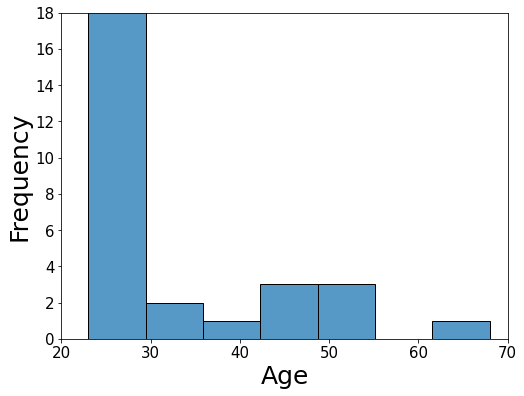

In [ ]:
plot_hist(age, 'Age', (20,70), (0,18))

(0.0, 18.0)

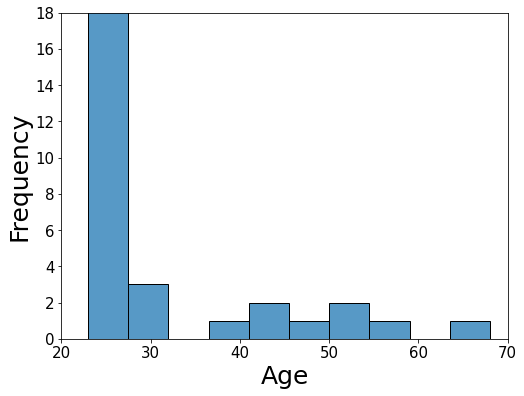

In [ ]:

plt.figure(figsize= (8,6))
sns.histplot(age, bins=10)
plt.xlabel('Age', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15 )
plt.xlim(20,70)
plt.ylim(0,18)

# Gender

In [ ]:
gender = results['Gender']
gender

0     Female
1       Male
2       Male
3       Male
4       Male
5       Male
6     Female
7       Male
8       Male
9     Female
10     Other
11    Female
12    Female
13      Male
14      Male
15    Female
16    Female
17    Female
18    Female
19    Female
20      Male
21    Female
22      Male
23    Female
24      Male
25    Female
26    Female
27    Female
28      Male
29      Male
Name: Gender, dtype: object

In [ ]:
gender = gender.value_counts()

In [ ]:
gender.index

Index(['Female', 'Male', 'Other'], dtype='object')

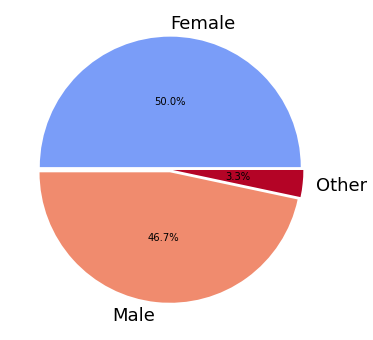

In [ ]:
#Using matplotlib
from matplotlib import cm
cs=cm.coolwarm([50,200,300])

pie, ax = plt.subplots(figsize=[10,6])
labels = gender.index
patches, texts, autotexts =  plt.pie(x=gender, autopct="%.1f%%", 
                                      explode=[0.02]*3,
                                      labels=labels, pctdistance=0.5,
                                      colors=cs)
for text in texts:
  text.set_fontsize(18)
plt.show()

# Task 1

## Emotions

In [ ]:
task1_emotions = results[results.columns[results.columns.str.contains('describes')]]

In [ ]:
task1_emotions = task1_emotions[task1_emotions.columns[~task1_emotions.columns.str.contains('wynik')]]

In [ ]:
task1_emotions.columns = ['answer_' + str(i) for i in range(42)]

In [ ]:
task1_emotions

,answer_0,answer_1,answer_2,answer_3,answer_4,answer_5,answer_6,answer_7,answer_8,answer_9,answer_10,answer_11,answer_12,answer_13,answer_14,answer_15,answer_16,answer_17,answer_18,answer_19,answer_20,answer_21,answer_22,answer_23,answer_24,answer_25,answer_26,answer_27,answer_28,answer_29,answer_30,answer_31,answer_32,answer_33,answer_34,answer_35,answer_36,answer_37,answer_38,answer_39,answer_40,answer_41
0,Surprise,Neutral,Anger,Anger,Happy,Disgust,Surprise,Surprise,Neutral,Happy,Happy,Happy,Happy,Neutral,Disgust,Disgust,Sad,Sad,Neutral,Neutral,Surprise,Anger,Disgust,Anger,Neutral,Sad,Anger,Neutral,Happy,Disgust,Happy,Happy,Happy,Neutral,Happy,Neutral,Sad,Disgust,Neutral,Surprise,Happy,Surprise
1,Neutral,Neutral,Neutral,Disgust,Neutral,Disgust,Surprise,Disgust,Neutral,Happy,Happy,Happy,Happy,Neutral,Disgust,Sad,Sad,Sad,Neutral,Surprise,Surprise,Surprise,Sad,Neutral,Neutral,Surprise,Happy,Surprise,Neutral,Neutral,Happy,Happy,Happy,Neutral,Sad,Neutral,Neutral,Neutral,Sad,Fear,Happy,Surprise
2,Disgust,Neutral,Anger,Disgust,Disgust,Disgust,Fear,Fear,Neutral,Happy,Happy,Happy,Neutral,Neutral,Neutral,Sad,Sad,Neutral,Surprise,Surprise,Surprise,Surprise,Disgust,Disgust,Disgust,Disgust,Surprise,Surprise,Fear,Disgust,Happy,Happy,Happy,Neutral,Neutral,Neutral,Sad,Sad,Neutral,Fear,Fear,Surprise
3,Neutral,Neutral,Neutral,Disgust,Disgust,Disgust,Fear,Sad,Neutral,Happy,Happy,Happy,Happy,Neutral,Anger,Sad,Sad,Neutral,Neutral,Surprise,Surprise,Surprise,Anger,Anger,Disgust,Sad,Disgust,Fear,Happy,Anger,Happy,Happy,Happy,Neutral,Neutral,Neutral,Anger,Sad,Neutral,Fear,Surprise,Surprise
4,Neutral,Neutral,Neutral,Neutral,Disgust,Anger,Fear,Surprise,Neutral,Happy,Happy,Happy,Disgust,Neutral,Neutral,Neutral,Sad,Sad,Neutral,Surprise,Surprise,Surprise,Disgust,Anger,Disgust,Disgust,Neutral,Disgust,Neutral,Neutral,Happy,Happy,Happy,Neutral,Disgust,Neutral,Neutral,Neutral,Neutral,Surprise,Surprise,Surprise
5,Surprise,Disgust,Anger,Neutral,Disgust,Disgust,Surprise,Fear,Neutral,Happy,Happy,Happy,Neutral,Neutral,Anger,Neutral,Sad,Neutral,Disgust,Surprise,Surprise,Anger,Disgust,Anger,Neutral,Disgust,Neutral,Neutral,Neutral,Disgust,Happy,Happy,Happy,Neutral,Disgust,Neutral,Neutral,Surprise,Neutral,Fear,Surprise,Fear
6,Anger,Neutral,Anger,Anger,Disgust,Anger,Neutral,Fear,Anger,Happy,Happy,Happy,Neutral,Neutral,Anger,Disgust,Sad,Neutral,Surprise,Surprise,Surprise,Surprise,Disgust,Anger,Sad,Disgust,Surprise,Disgust,Disgust,Disgust,Happy,Happy,Happy,Neutral,Neutral,Neutral,Disgust,Neutral,Neutral,Surprise,Surprise,Surprise
7,Neutral,Neutral,Neutral,Disgust,Disgust,Disgust,Fear,Fear,Sad,Happy,Happy,Happy,Happy,Neutral,Anger,Sad,Sad,Neutral,Neutral,Surprise,Surprise,Surprise,Neutral,Neutral,Anger,Disgust,Surprise,Neutral,Neutral,Neutral,Happy,Happy,Happy,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Fear,Happy,Surprise
8,Anger,Neutral,Neutral,Neutral,Disgust,Disgust,Surprise,Sad,Neutral,Happy,Happy,Happy,Neutral,Neutral,Anger,Sad,Sad,Sad,Neutral,Fear,Surprise,Disgust,Disgust,Anger,Neutral,Disgust,Neutral,Neutral,Neutral,Neutral,Neutral,Happy,Happy,Neutral,Disgust,Neutral,Neutral,Disgust,Neutral,Fear,Surprise,Surprise
9,Neutral,Neutral,Anger,Fear,Disgust,Disgust,Fear,Fear,Neutral,Happy,Happy,Happy,Neutral,Neutral,Neutral,Neutral,Sad,Neutral,Surprise,Surprise,Surprise,Neutral,Disgust,Neutral,Neutral,Fear,Neutral,Surprise,Neutral,Neutral,Happy,Neutral,Happy,Neutral,Disgust,Neutral,Neutral,Sad,Fear,Surprise,Surprise,Surprise


In [ ]:
task1_emotions_real = task1_emotions[task1_emotions.columns[0:21]]

In [ ]:
emotion_dict = {0:'Anger',
                1:'Disgust',
                2:'Fear',
                3:'Happy',
                4:'Neutral',
                5:'Sad',
                6:'Surprise'}

In [ ]:
heatmap_df_real = pd.DataFrame(index=emotion_dict.values(), columns=emotion_dict.values())
heatmap_df_real = heatmap_df_real.fillna(0)
for i in range(0,21,3):
  current_emotion = emotion_dict[i/3]
  print(current_emotion)
  for j in range(i,i+3):
    current_col = 'answer_' + str(j)
    print(current_col)
    for iter, item in task1_emotions_real[current_col].iteritems():
      heatmap_df_real.loc[current_emotion, item] += 1

Anger
answer_0
answer_1
answer_2
Disgust
answer_3
answer_4
answer_5
Fear
answer_6
answer_7
answer_8
Happy
answer_9
answer_10
answer_11
Neutral
answer_12
answer_13
answer_14
Sad
answer_15
answer_16
answer_17
Surprise
answer_18
answer_19
answer_20


In [ ]:
heatmap_df_real

,Anger,Disgust,Fear,Happy,Neutral,Sad,Surprise
Anger,18,10,0,0,52,7,3
Disgust,11,58,5,3,10,2,1
Fear,8,8,30,0,22,7,15
Happy,3,0,0,84,3,0,0
Neutral,17,6,1,11,46,9,0
Sad,1,9,2,0,20,57,1
Surprise,1,3,8,0,13,0,65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


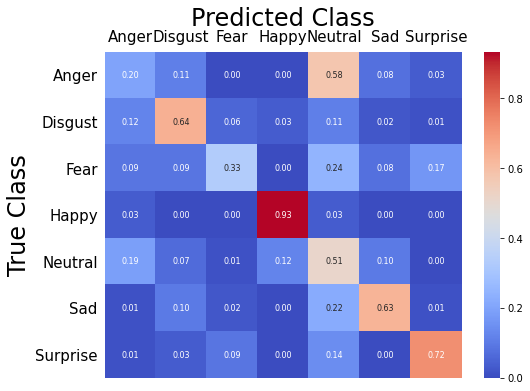

In [ ]:
plot_heatmap(heatmap_df_real/90, 15,24)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


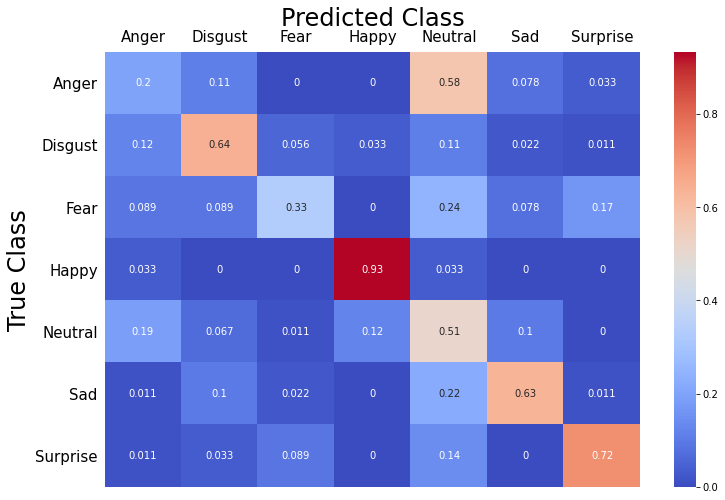

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df_real/90, cmap='coolwarm', annot=True)
ax = plt.axes()
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, )
plt.tick_params(axis='y', which='major', labelsize=15, labelleft = True, left=False, right = False, labelright=False,labelrotation=360)
plt.xlabel("Predicted Class", fontsize=24, )
plt.ylabel("True Class", fontsize=24)
ax.xaxis.set_label_position('top') 

## Fake emotions

In [ ]:
task1_emotions_fake = task1_emotions[task1_emotions.columns[21:]]

In [ ]:
heatmap_df_fake = pd.DataFrame(index=emotion_dict.values(), columns=emotion_dict.values())
heatmap_df_fake = heatmap_df_fake.fillna(0)
for i in range(21,42,3):
  current_emotion = emotion_dict[(i-21)/3]
  print(current_emotion)
  for j in range(i,i+3):
    current_col = 'answer_' + str(j)
    print(current_col)
    for iter, item in task1_emotions_fake[current_col].iteritems():
      heatmap_df_fake.loc[current_emotion, item] += 1

Anger
answer_21
answer_22
answer_23
Disgust
answer_24
answer_25
answer_26
Fear
answer_27
answer_28
answer_29
Happy
answer_30
answer_31
answer_32
Neutral
answer_33
answer_34
answer_35
Sad
answer_36
answer_37
answer_38
Surprise
answer_39
answer_40
answer_41


In [ ]:
heatmap_df_fake

,Anger,Disgust,Fear,Happy,Neutral,Sad,Surprise
Anger,29,19,2,1,17,2,20
Disgust,13,24,7,1,23,15,7
Fear,4,25,9,3,35,1,13
Happy,3,0,0,80,7,0,0
Neutral,4,20,1,2,57,3,3
Sad,3,14,4,0,36,30,3
Surprise,2,1,24,6,2,0,55


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


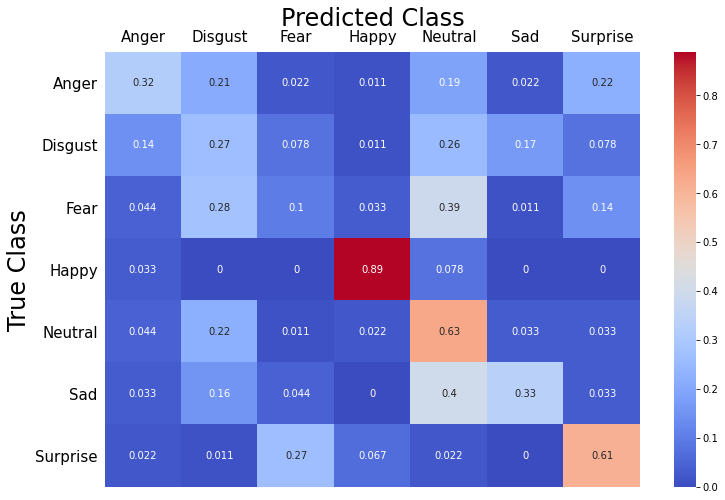

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_df_fake/90, cmap='coolwarm', annot=True)
ax = plt.axes()
plt.tick_params(axis='x', which='major', labelsize=15, labelbottom = False, bottom=False, top = False, labeltop=True, )
plt.tick_params(axis='y', which='major', labelsize=15, labelleft = True, left=False, right = False, labelright=False,labelrotation=360)
plt.xlabel("Predicted Class", fontsize=24, )
plt.ylabel("True Class", fontsize=24)
ax.xaxis.set_label_position('top')

# Result

In [ ]:
task1 = results[results.columns[results.columns.str.contains('describes')]]

In [ ]:
task1 = task1[task1.columns[task1.columns.str.contains('wynik')]]

In [ ]:
task1.columns = ['wynik_' + str(i) for i in range(42)]

In [ ]:
task1 = task1.apply(lambda x: x.str[0])
task1 = task1.astype(int)
task1

,wynik_0,wynik_1,wynik_2,wynik_3,wynik_4,wynik_5,wynik_6,wynik_7,wynik_8,wynik_9,wynik_10,wynik_11,wynik_12,wynik_13,wynik_14,wynik_15,wynik_16,wynik_17,wynik_18,wynik_19,wynik_20,wynik_21,wynik_22,wynik_23,wynik_24,wynik_25,wynik_26,wynik_27,wynik_28,wynik_29,wynik_30,wynik_31,wynik_32,wynik_33,wynik_34,wynik_35,wynik_36,wynik_37,wynik_38,wynik_39,wynik_40,wynik_41
0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1
1,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1
2,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0,0,1,1,1,1,0,0,1,1,1,0,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1
4,0,0,0,0,1,0,1,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1
5,0,0,1,0,1,1,0,1,0,1,1,1,1,1,0,0,1,0,0,1,1,1,0,1,0,1,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0
6,1,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,1
7,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,1
8,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,1
9,0,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1


In [ ]:
means = task1.describe().loc['mean']

In [ ]:
np.mean(means[0:21])

0.5682539682539683

In [ ]:
np.mean(means[21:])

0.4507936507936507

In [ ]:
task1_sum = task1.sum(axis=1)
task1_sum

0     19
1     18
2     29
3     26
4     22
5     21
6     24
7     21
8     20
9     23
10     6
11    24
12    24
13    22
14    22
15    21
16    19
17    24
18    20
19    22
20    23
21    19
22    23
23    21
24    22
25    26
26    21
27    19
28    21
29    20
dtype: int64

In [ ]:
task1.columns[0:21]

Index(['wynik_0', 'wynik_1', 'wynik_2', 'wynik_3', 'wynik_4', 'wynik_5',
       'wynik_6', 'wynik_7', 'wynik_8', 'wynik_9', 'wynik_10', 'wynik_11',
       'wynik_12', 'wynik_13', 'wynik_14', 'wynik_15', 'wynik_16', 'wynik_17',
       'wynik_18', 'wynik_19', 'wynik_20'],
      dtype='object')

In [ ]:
task1_real = task1[task1.columns[0:21]]

In [ ]:
task1_real_sum = task1_real.sum(axis=1)
task1_real_sum

0      9
1     11
2     17
3     12
4     11
5     12
6     13
7     13
8     12
9     15
10     2
11    15
12    12
13    12
14    13
15    12
16    11
17    15
18     9
19    11
20    11
21    11
22    13
23    12
24    13
25    13
26    13
27    12
28    11
29    12
dtype: int64

In [ ]:
task1_fake = task1[task1.columns[21:]]

In [ ]:
task1_fake_sum = task1_fake.sum(axis=1)
task1_fake_sum

0     10
1      7
2     12
3     14
4     11
5      9
6     11
7      8
8      8
9      8
10     4
11     9
12    12
13    10
14     9
15     9
16     8
17     9
18    11
19    11
20    12
21     8
22    10
23     9
24     9
25    13
26     8
27     7
28    10
29     8
dtype: int64

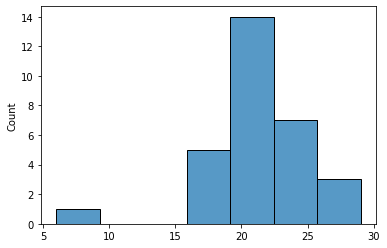

In [ ]:
sns.histplot(task1_sum, bins=7)

In [ ]:
sns.set_style("whitegrid")


In [ ]:
np.mean(task1_fake_sum)/0.21

45.07936507936508

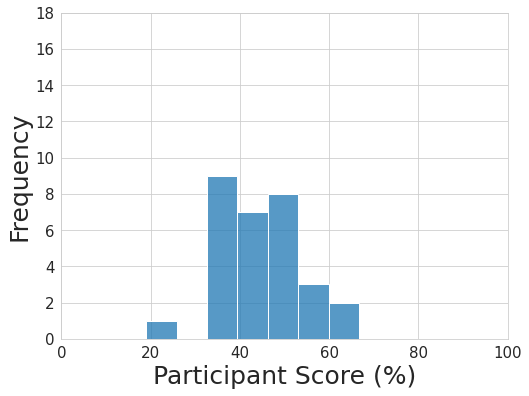

In [ ]:
plot_hist(task1_fake_sum/21*100, 'Participant Score (%)', (0,100), (0,18))

Text(0, 0.5, 'Frequency')

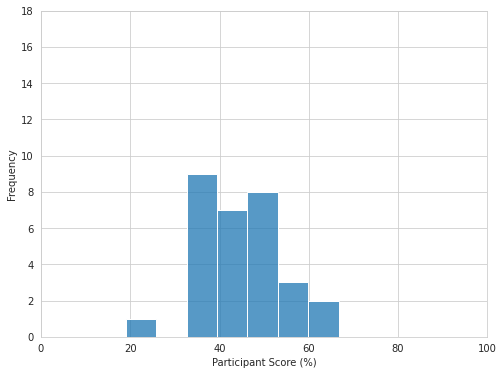

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(task1_fake_sum/21*100, bins=7)
plt.ylim(0, 18)
plt.xlim(0, 100)
plt.xlabel('Participant Score (%)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

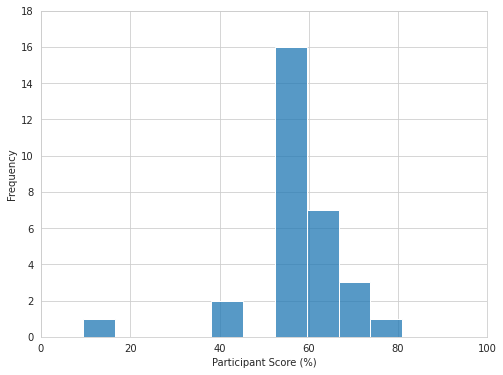

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(task1_real_sum/21*100, bins=10)
plt.ylim(0, 18)
plt.xlim(0, 100)
plt.xlabel('Participant Score (%)')
plt.ylabel('Frequency')

In [ ]:
np.mean(task1_real_sum)/0.21

56.82539682539683

# Task 2

In [ ]:
task2 = results[results.columns[results.columns.str.contains('real')]]

In [ ]:
task2 = task2[task2.columns[task2.columns.str.contains('wynik')]]

In [ ]:
task2.columns = ['wynik_' + str(i) for i in range(42)]

In [ ]:
task2 = task2.apply(lambda x: x.str[0])
task2 = task2.astype(int)
task2

,wynik_0,wynik_1,wynik_2,wynik_3,wynik_4,wynik_5,wynik_6,wynik_7,wynik_8,wynik_9,wynik_10,wynik_11,wynik_12,wynik_13,wynik_14,wynik_15,wynik_16,wynik_17,wynik_18,wynik_19,wynik_20,wynik_21,wynik_22,wynik_23,wynik_24,wynik_25,wynik_26,wynik_27,wynik_28,wynik_29,wynik_30,wynik_31,wynik_32,wynik_33,wynik_34,wynik_35,wynik_36,wynik_37,wynik_38,wynik_39,wynik_40,wynik_41
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0
7,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
task2_sum = task2.sum(axis=1)
task2_sum

0     39
1     41
2     42
3     41
4     40
5     39
6     35
7     39
8     42
9     40
10    33
11    40
12    40
13    42
14    36
15    39
16    39
17    38
18    41
19    40
20    40
21    40
22    41
23    40
24    39
25    37
26    41
27    36
28    42
29    40
dtype: int64

In [ ]:
[task2.columns[0:21]]

[Index(['wynik_0', 'wynik_1', 'wynik_2', 'wynik_3', 'wynik_4', 'wynik_5',
        'wynik_6', 'wynik_7', 'wynik_8', 'wynik_9', 'wynik_10', 'wynik_11',
        'wynik_12', 'wynik_13', 'wynik_14', 'wynik_15', 'wynik_16', 'wynik_17',
        'wynik_18', 'wynik_19', 'wynik_20'],
       dtype='object')]

In [ ]:
task2_real = task2[task2.columns[0:21]]

In [ ]:
task2_real_sum = task2_real.sum(axis=1)
task2_real_sum

0     20
1     20
2     21
3     21
4     19
5     18
6     20
7     20
8     21
9     21
10    14
11    20
12    21
13    21
14    19
15    20
16    20
17    20
18    20
19    19
20    20
21    21
22    20
23    19
24    20
25    20
26    21
27    15
28    21
29    20
dtype: int64

In [ ]:
task2_fake = task2[task2.columns[21:]]

In [ ]:
task2_fake_sum = task2_fake.sum(axis=1)
task2_fake_sum

0     19
1     21
2     21
3     20
4     21
5     21
6     15
7     19
8     21
9     19
10    19
11    20
12    19
13    21
14    17
15    19
16    19
17    18
18    21
19    21
20    20
21    19
22    21
23    21
24    19
25    17
26    20
27    21
28    21
29    20
dtype: int64

In [ ]:
np.mean(task2_fake_sum)/0.21

93.65079365079366

Text(0, 0.5, 'Frequency')

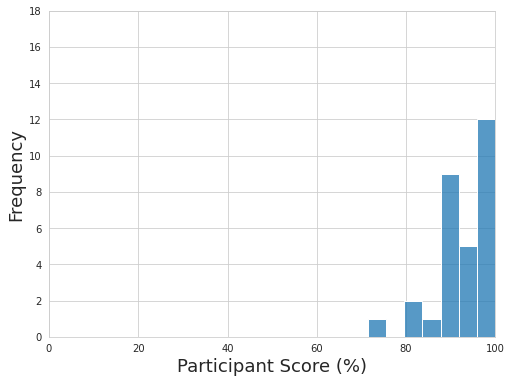

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(task2_fake_sum/21*100, bins=7)
plt.ylim(0, 18)
plt.xlim(0, 100)
plt.xlabel('Participant Score (%)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

In [ ]:
np.mean(task2_real_sum)/0.21

93.96825396825398

Text(0, 0.5, 'Frequency')

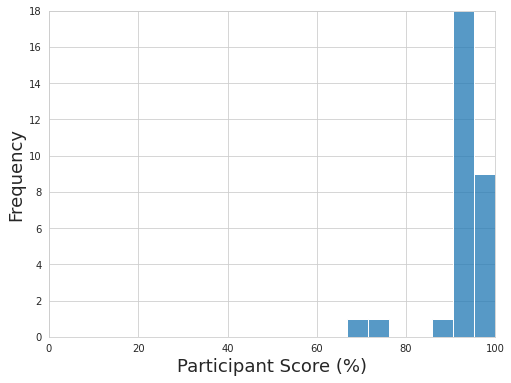

In [ ]:
plt.figure(figsize= (8,6))
sns.histplot(task2_real_sum/21*100, bins=7)
plt.ylim(0, 18)
plt.xlim(0, 100)
plt.xlabel('Participant Score (%)',fontsize=18)
plt.ylabel('Frequency',fontsize=18)

In [ ]:
heatmap_real_fake = pd.DataFrame(index=['Real', 'Generated'], columns=['Real', 'Generated'])
heatmap_real_fake = heatmap_real_fake.fillna(0)
heatmap_real_fake

,Real,Generated
Real,0,0
Generated,0,0


In [ ]:
heatmap_real_fake.loc['Real', 'Real'] = task2_real_sum.sum()
heatmap_real_fake.loc['Real', 'Generated'] = 630 - task2_real_sum.sum()
heatmap_real_fake.loc['Generated', 'Real'] = 630 - task2_fake_sum.sum()
heatmap_real_fake.loc['Generated', 'Generated'] = task2_fake_sum.sum()
heatmap_real_fake

,Real,Generated
Real,592,38
Generated,40,590


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


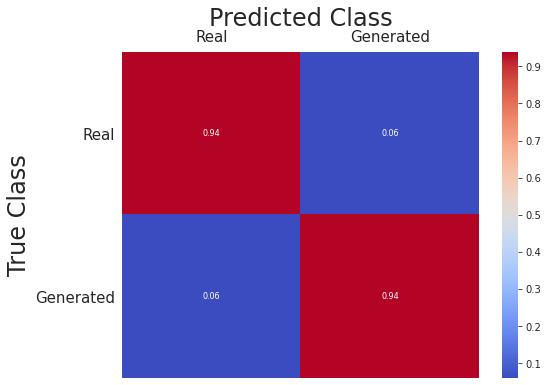

In [ ]:
plot_heatmap(heatmap_real_fake/630)

In [ ]:
21*30

630

In [ ]:
task2_fake_sum.sum()

590

In [ ]:
task2_real_sum.sum()

592

# T-Test

## Task 1

In [ ]:
task1_df = pd.DataFrame(data={'Real':task1_real_sum,
                              'Generated': task1_fake_sum})
task1_df

,Real,Generated
0,9,10
1,11,7
2,17,12
3,12,14
4,11,11
5,12,9
6,13,11
7,13,8
8,12,8
9,15,8


In [ ]:
from scipy import stats

In [ ]:
k2, p = stats.normaltest(task1_df['Real'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.2159e-06
The null hypothesis can be rejected


In [ ]:
k2, p = stats.normaltest(task1_df['Generated'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.533882
The null hypothesis cannot be rejected


In [ ]:
t, p = stats.ttest_rel(task1_df['Real'],task1_df['Generated'])
print(f'T value: {t:.2f} \nP value: {p:.6f}')

T value: 5.20 
P value: 0.000014


## Task 2

In [ ]:
task2_df = pd.DataFrame(data={'Real':task2_real_sum,
                              'Generated': task2_fake_sum})
task2_df

,Real,Generated
0,20,19
1,20,21
2,21,21
3,21,20
4,19,21
5,18,21
6,20,15
7,20,19
8,21,21
9,21,19


In [ ]:
k2, p = stats.normaltest(task2_df['Real'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 1.88523e-07
The null hypothesis can be rejected


In [ ]:
k2, p = stats.normaltest(task2_df['Generated'])
alpha = 1e-3
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.00317471
The null hypothesis cannot be rejected


In [ ]:
t, p = stats.ttest_rel(task2_df['Real'],task2_df['Generated'])
print(f'T value: {t:.2f} \nP value: {p:.6f}')

T value: 0.16 
P value: 0.871795


# All plots

## Histograms

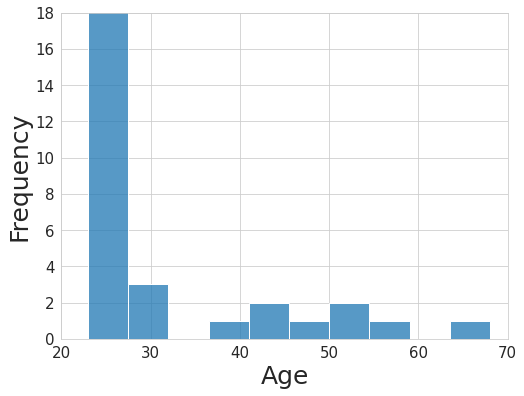

In [ ]:
plot_hist(age, 'Age', (20,70), (0,18), 10)

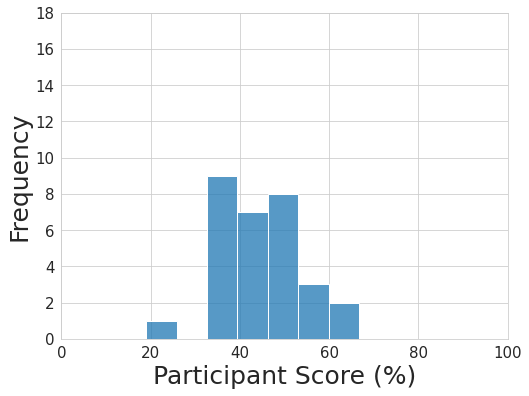

In [ ]:
plot_hist(task1_fake_sum/21*100, 'Participant Score (%)', (0,100), (0,18))

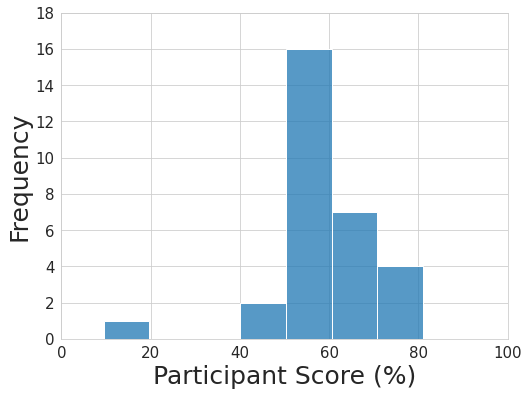

In [ ]:
plot_hist(task1_real_sum/21*100, 'Participant Score (%)', (0,100), (0,18))

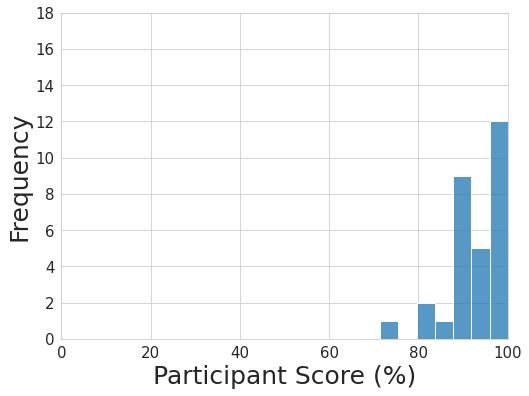

In [ ]:
plot_hist(task2_fake_sum/21*100, 'Participant Score (%)', (0,100), (0,18))

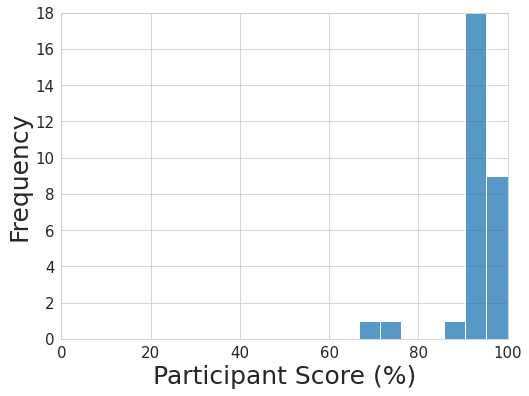

In [ ]:
plot_hist(task2_real_sum/21*100, 'Participant Score (%)', (0,100), (0,18))

## Heatmaps

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


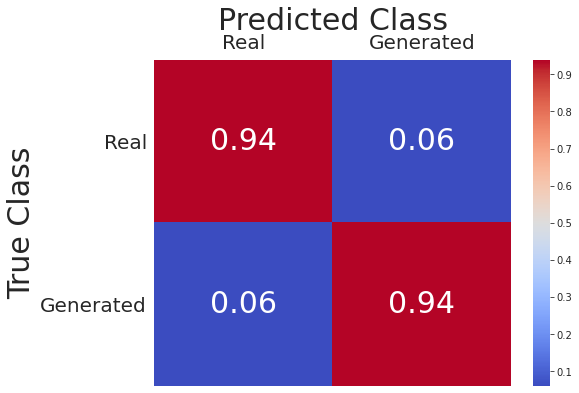

In [ ]:
plot_heatmap(heatmap_real_fake/630,20,30, annot_font_size=30, rotation=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


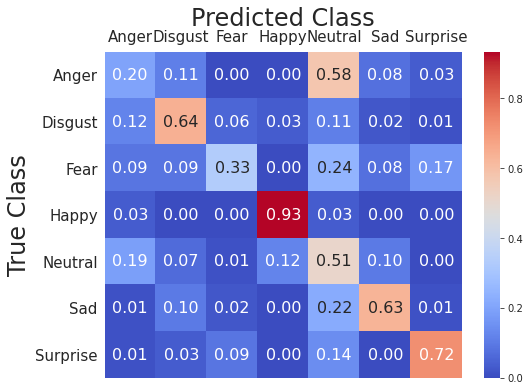

In [ ]:
plot_heatmap(heatmap_df_real/90, 15,24, annot_font_size=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


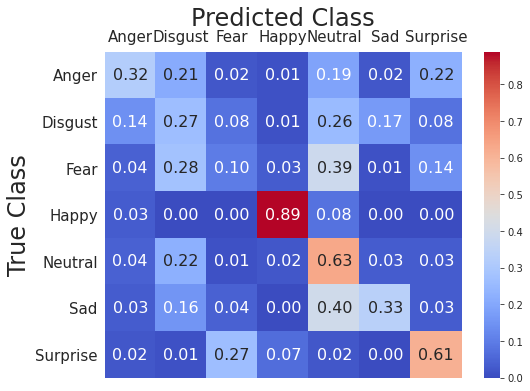

In [ ]:
plot_heatmap(heatmap_df_fake/90, 15,24, annot_font_size=16)